In [1]:
import tensorflow as tf  
import numpy as np  
import cv2  
import matplotlib.image as mpimg  
import matplotlib.pyplot as plt  
  
img_size = 128  # This needs to be consistent with your model training  
  
def preprocess_image(image_path):  
    """Load an image, resize it, and normalize it."""  
    image = mpimg.imread(image_path)  
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR) if image.shape[-1] == 4 else image  
    image = cv2.resize(image, (img_size, img_size))  
    image = image / 255.0  
    return np.array([image])  
  
def predict_image_status_tflite(interpreter, image_path, threshold=0.07):  
    preprocessed_image = preprocess_image(image_path)  
      
    # Set the model input  
    interpreter.set_tensor(input_details[0]['index'], preprocessed_image.astype(np.float32))  
      
    # Run the model (perform inference)  
    interpreter.invoke()  
      
    # Get the model output  
    reconstructed_image = interpreter.get_tensor(output_details[0]['index'])  
      
    reconstruction_error = np.mean(np.abs(preprocessed_image - reconstructed_image))  
      
    is_anomaly = reconstruction_error > threshold  
    status = 'Anomaly' if is_anomaly else 'Good'  
      
    print(f"Status: {status}, Reconstruction Error: {reconstruction_error}")  
    # Removing the batch dimension for display  
    original_np = np.squeeze(preprocessed_image, axis=0)  
    reconstructed_np = np.squeeze(reconstructed_image, axis=0)  
    display_images(original_np, reconstructed_np)  
    
      
def display_images(original, reconstructed):  
    """Display original, reconstructed images, and their difference."""  
    plt.figure(figsize=(18, 6))  
  
    # Original  
    plt.subplot(1, 3, 1)  
    plt.title('Original Image')  
    plt.imshow(original)  
    plt.axis('off')  
  
    # Reconstructed  
    plt.subplot(1, 3, 2)  
    plt.title('Reconstructed Image')  
    plt.imshow(reconstructed)  
    plt.axis('off')  
  
    # Difference  
    plt.subplot(1, 3, 3)  
    plt.title('Difference')  
    difference = np.abs(original - reconstructed)  
    plt.imshow(difference, cmap='gray')  
    plt.axis('off')  
  
    plt.show()  
  

In [6]:
# Load the TFLite model and allocate tensors (memory for the model's input and outputs)  
interpreter = tf.lite.Interpreter(model_path="output/autoencoder_model.tflite")  
interpreter.allocate_tensors()  
  
# Get input and output tensors information from the interpreter  
input_details = interpreter.get_input_details()  
output_details = interpreter.get_output_details()  

In [10]:
print("INPUT")
print(input_details)

print("\n\nOUTPUT")
print(output_details)

INPUT
[{'name': 'serving_default_sequential_input:0', 'index': 0, 'shape': array([  1, 128, 128,   3], dtype=int32), 'shape_signature': array([ -1, 128, 128,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


OUTPUT
[{'name': 'StatefulPartitionedCall:0', 'index': 52, 'shape': array([  1, 128, 128,   3], dtype=int32), 'shape_signature': array([ -1, 128, 128,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


Status: Anomaly, Reconstruction Error: 0.07542718727242907


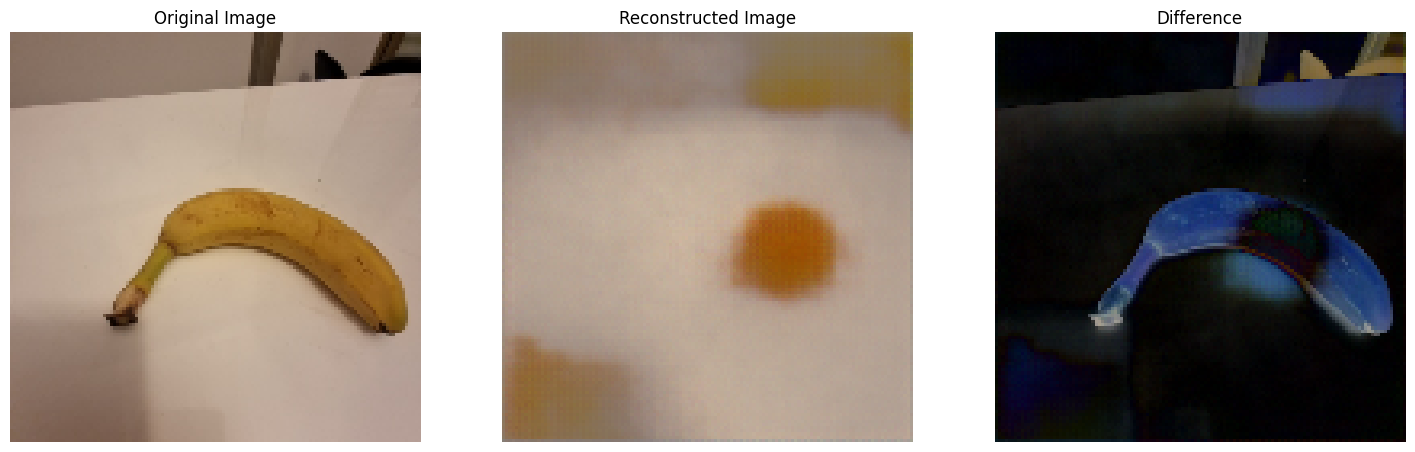

Status: Good, Reconstruction Error: 0.040741466180019247


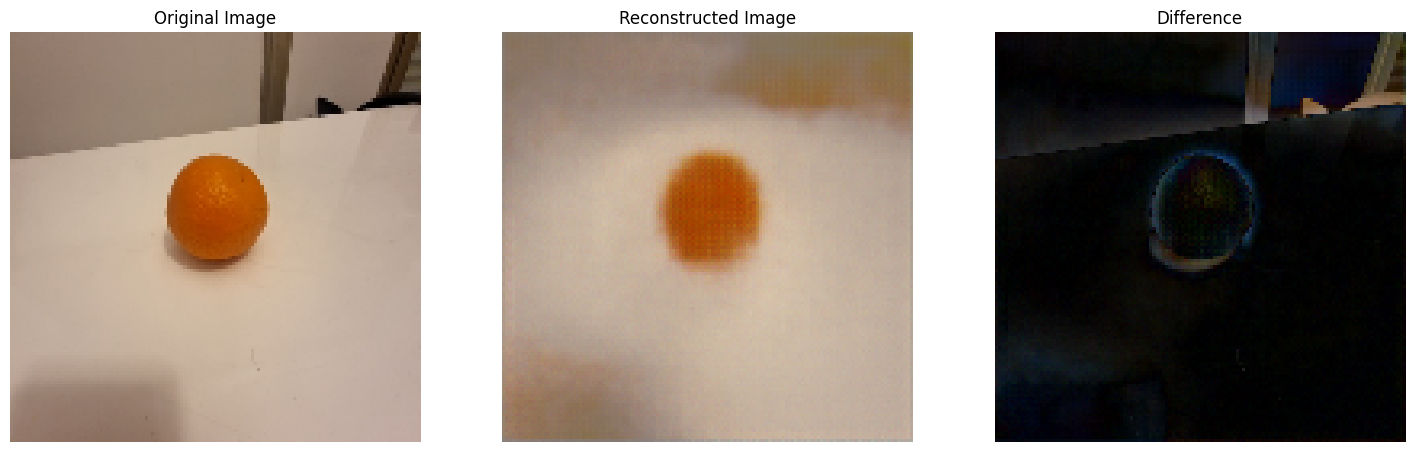

In [12]:
# You would replace "optimal_threshold" with the actual threshold value you determined to be optimal.  
optimal_threshold = 0.07  # This is an example value; adjust it based on your specific use case  
  
# Example usages:  
predict_image_status_tflite(interpreter, "test/banana.4piv5bho.ingestion-d59dc547b-j6mhk.jpg", threshold=optimal_threshold)  
predict_image_status_tflite(interpreter, "test/orange.4piv9lmk.ingestion-d59dc547b-94nn2.jpg", threshold=optimal_threshold)  